In [47]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# Configuration des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [53]:
# importation du fichier csv
from google.colab import files
uploaded = files.upload()

Saving donnees_cliniques1.csv to donnees_cliniques1.csv


In [54]:
#chargement des données
import pandas as pd

df = pd.read_csv('donnees_cliniques1.csv')

#Apercu des premères lignes
print("Aperçu des données :")
df.head()

Aperçu des données :


,patient_id,date_consultation,age,prescription_medicament,poids,groupe_sanguin
0,1,28/09/00,45.0,EFFERALGAN,N,A+
1,2,29/09/00,46.0,EFFERALGAN,60,A+
2,3,30/09/00,47.0,EFFERALGAN,NaN,A+
3,4,01/10/00,48.0,EFFERALGAN,50.6,A+
4,5,02/10/00,49.0,Doliprane,50.7,A+


In [62]:
df_brut = df.copy()


In [55]:
print(df.columns.tolist())


['patient_id', 'date_consultation', 'age', 'prescription_medicament', 'poids', 'groupe_sanguin']


In [56]:
#Nettoyer les noms de colonnes (enlever espaces invisibles)
df.columns = df.columns.str.strip()

In [57]:
#Nettoyer les espaces dans les colonnes texte
df['date_consultation'] = df['date_consultation'].str.strip()
df['prescription_medicament'] = df['prescription_medicament'].str.strip()

In [58]:
#Convertir la colonne date en datetime (jj/mm/aa), gérer erreurs en NaT
df['date_consultation'] = pd.to_datetime(df['date_consultation'], dayfirst=True, errors='coerce')

/tmp/ipython-input-1745869516.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_consultation'] = pd.to_datetime(df['date_consultation'], dayfirst=True, errors='coerce')


In [59]:
#Nettoyer les âges aberrants
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[(df['age'] > 100) | (df['age'] < 0), 'age'] = np.nan  # supposer âge raisonnable

In [60]:
#Gérer les poids (convertir en float, valeurs aberrantes)
df['poids'] = pd.to_numeric(df['poids'], errors='coerce')
df.loc[(df['poids'] > 300) | (df['poids'] < 2), 'poids'] = np.nan  # poids plausible en kg

In [61]:
def harmonize_medicament(name):
    # Si la valeur est manquante (NaN), on retourne NaN directement
    if pd.isna(name):
        return np.nan

    # On convertit le texte en minuscules pour uniformiser (ex: "Doliprane" → "doliprane")
    # et on enlève les espaces inutiles en début et fin de chaîne (ex: "  Doliprane " → "doliprane")
    name = name.lower().strip()

    # On vérifie si la chaîne contient l’un des mots clés indiquant du paracetamol
    # 'any' renvoie True si au moins un élément dans la liste est trouvé dans la chaîne 'name'
    if any(x in name for x in ['paracetamol', 'paracétamol', 'doliprane', 'efferalgan', 'dafalgan', 'daffalgan']):
        # Si un des mots est trouvé, on standardise la valeur à "paracetamol"
        return 'paracetamol'
    else:
        # Sinon, on laisse la valeur telle quelle (avec sa casse minuscule et espaces nettoyés)
        return name

# On applique cette fonction à toute la colonne 'prescription_medicament' de ton DataFrame
df['prescription_medicament'] = df['prescription_medicament'].apply(harmonize_medicament)


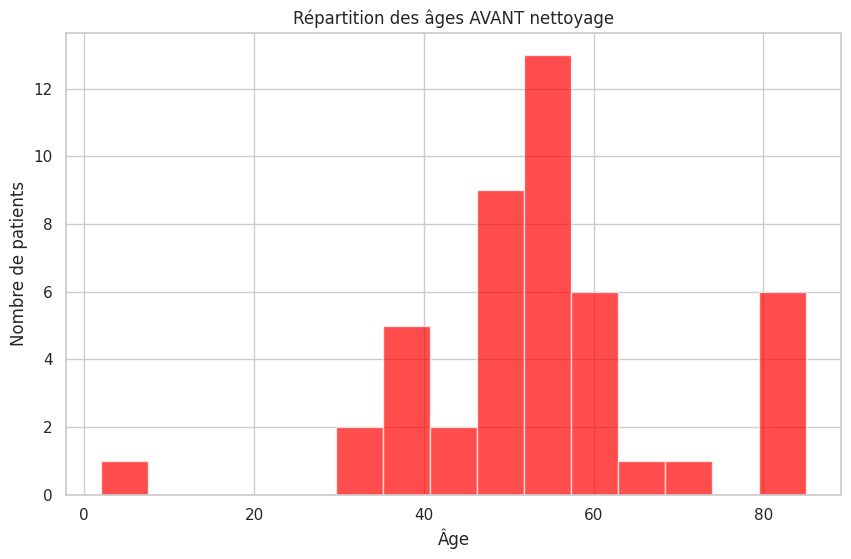

In [63]:
# Exemple : histogramme des âges AVANT nettoyage
plt.hist(pd.to_numeric(df_brut['age'], errors='coerce').dropna(), bins=15, color='red', alpha=0.7)
plt.title("Répartition des âges AVANT nettoyage")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()


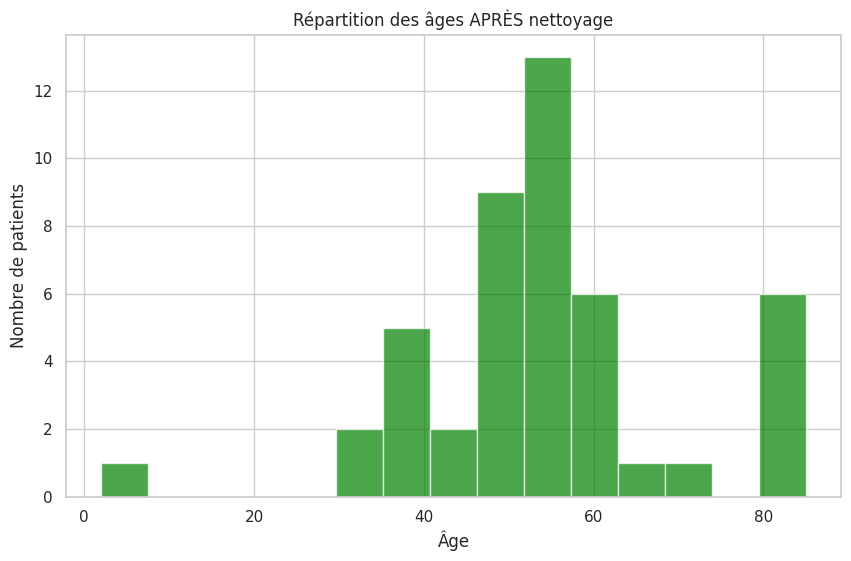

In [64]:
# Exemple : histogramme des âges APRÈS nettoyage
plt.hist(df['age'].dropna(), bins=15, color='green', alpha=0.7)
plt.title("Répartition des âges APRÈS nettoyage")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()


In [65]:
# export du fichier nettoyé
df.to_csv('donnees_cliniques_nettoyees.csv', index=False)
